In [ ]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import gc

tf.Tensor(
[[[0.         0.0067402  0.93101645]
  [0.00372243 0.00242417 0.8814186 ]
  [0.01659007 0.00813419 0.87525284]
  ...
  [0.00873928 0.00444623 0.86065036]
  [0.01433824 0.00475643 0.8773438 ]
  [0.00454963 0.00503217 0.9138098 ]]

 [[0.02977941 0.00203355 0.9056641 ]
  [0.33615583 0.31433058 0.8027421 ]
  [0.39271602 0.37334946 0.616031  ]
  ...
  [0.2551892  0.2358456  0.503799  ]
  [0.33413762 0.31491268 0.6726831 ]
  [0.12278263 0.1088848  0.730442  ]]

 [[0.02025888 0.00420496 0.89089316]
  [0.36768156 0.33828512 0.6184398 ]
  [0.4912263  0.46256897 0.3626034 ]
  ...
  [0.42852333 0.40628833 0.3351946 ]
  [0.41042435 0.39498317 0.45513943]
  [0.1535118  0.1387255  0.57757354]]

 ...

 [[0.00449219 0.00130974 0.86784625]
  [0.65969676 0.7059207  0.9532016 ]
  [0.81265706 0.8647749  0.8332951 ]
  ...
  [0.71353024 0.6689223  0.5749809 ]
  [0.677608   0.6516391  0.70492494]
  [0.21375614 0.21963848 0.6349112 ]]

 [[0.         0.00372243 0.88172495]
  [0.638086   0.69330204 0

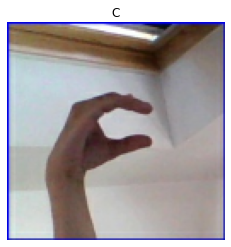

In [ ]:
def parse_image(filename):
  parts=tf.strings.split(filename, os.sep)
  label=parts[-2]
  image1=tf.io.read_file(filename)
  image1=tf.image.decode_jpeg(image1)
  image1=tf.image.convert_image_dtype(image1, tf.float32)
  image1=tf.image.resize(image1, [128, 128])
  return image1, label

file_path="/content/drive/MyDrive/ASL_Grassknoted_Kaggle/Dataset_Unzipped/asl_alphabet_train/asl_alphabet_train/C/C1002.jpg"
img1, label=parse_image(file_path)
print(img1, label)
def showi(img, label):
  plt.figure()
  plt.imshow(img)
  plt.title(label.numpy().decode('utf-8'))
  plt.axis('off')
showi(img1, label)

In [ ]:
batch_size=32
width=200
height=200
data_dir="/content/drive/MyDrive/ASL_Grassknoted_Kaggle/Dataset_Unzipped/asl_alphabet_train/asl_alphabet_train"
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(height, width),
    batch_size=batch_size)

Found 87000 files belonging to 29 classes.
Using 69600 files for training.


In [ ]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(height, width),
    batch_size=batch_size
    )

Found 87000 files belonging to 29 classes.
Using 17400 files for validation.


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


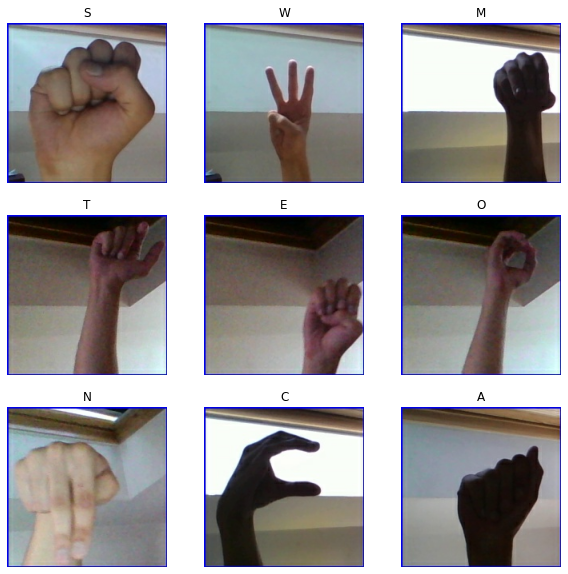

In [ ]:
class_names=train_ds.class_names
print(class_names)
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Not using because drastically overflows RAM

Autotune=tf.data.AUTOTUNE<br>
train_ds=train_ds.cache().prefetch(buffer_size=Autotune)<br>
val_ds=val_ds.cache().prefetch(buffer_size=Autotune)

In [ ]:
num_classes=29
model=tf.keras.Sequential([
                           tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
                           tf.keras.layers.Conv2D(32,2,activation='relu'),
                           tf.keras.layers.MaxPooling2D(),
                           tf.keras.layers.Conv2D(32,2,activation='relu'),
                           tf.keras.layers.MaxPooling2D(),
                           tf.keras.layers.Conv2D(32,2,activation='relu'),
                           tf.keras.layers.MaxPooling2D(),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(num_classes)
                           ])

In [ ]:
model.compile(optimizer='adam', 
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )
checkpoint_path="/content/drive/MyDrive/ASL_Grassknoted_Kaggle/Dataset_Unzipped/Checkpoints1/cp.ckpt"
checkpoint_dir=os.path.dirname(checkpoint_path)
cp_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=int(batch_size*8)
    )
class mycustomcb(tf.keras.callbacks.Callback):
  def on_train_batch_end(self, batch , logs=None):
    gc.collect()

In [ ]:
model.load_weights(checkpoint_path)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 199, 199, 32)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0

In [ ]:
model.fit(train_ds, validation_data=val_ds, epochs=10, callbacks=[cp_callback, mycustomcb()])

Epoch 1/10
 168/2175 [=>............................] - ETA: 2:25:34 - loss: 0.0152 - accuracy: 0.9959

KeyboardInterrupt: ignored

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/My_Model_1.h5')

In [ ]:
new_model=tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/My_Model3.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 197, 197, 16)      784       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 153664)            0         
_________________________________________________________________
dense (Dense)                (None, 29)                4456285   
Total params: 4,457,069
Trainable params: 4,457,069
Non-trainable params: 0
_________________________________________________________________


Predictions

In [ ]:
from os import listdir
from PIL import Image

def loadImages(path):
    # return array of images

    imagesList = listdir(path)
    loadedImages = []
    imgnames=[]
    for image in imagesList:
        img = Image.open(path + image)
        loadedImages.append(img)
        imgnames.append(image[:-9])

    return loadedImages,imgnames

test_dir = "/content/drive/MyDrive/ASL_Grassknoted_Kaggle/Dataset_Unzipped/asl_alphabet_test/asl_alphabet_test/"

# your images in an array
imgs, imgnames=loadImages(test_dir)
plt.figure(figsize=(15,25))
i=0
for img in imgs:
    plt.subplot(7,4,i+1)
    plt.grid(False)
    img=np.asarray(img)
    plt.imshow(np.asarray(img))
    plt.xlabel(imgnames[i])
    i=i+1

In [ ]:
probability_model=tf.keras.Sequential([new_model, tf.keras.layers.Softmax()])
predictions=probability_model.predict(np.expand_dims(imgs[0],0))
print(predictions)
print(class_names[np.argmax(predictions[0])], 100*np.max(predictions))

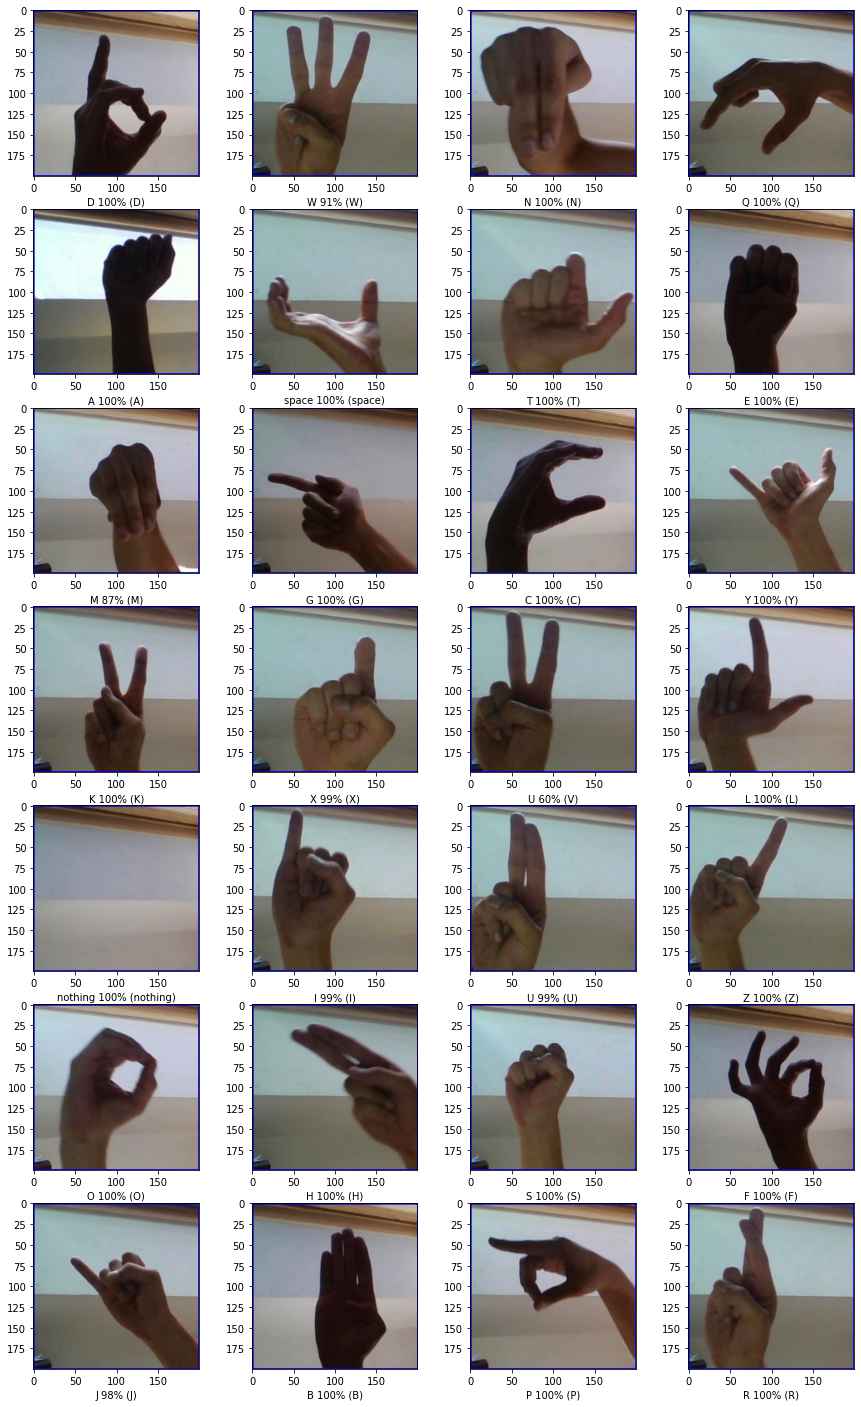

In [ ]:
plt.figure(figsize=(15,25))
i=0
for img in imgs:
    plt.subplot(7,4,i+1)
    plt.grid(False)
    img=np.asarray(img)
    plt.imshow(np.asarray(img))
    predictions=probability_model.predict(np.expand_dims(imgs[i],0))
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.argmax(predictions[0])], 100*np.max(predictions[0]), imgnames[i]))
    i=i+1

In [ ]:
img=test_images[1]
print(img.shape)
img=np.expand_dims(img,0)
img.shape
predictions_single=probability_model.predict(img)
print(predictions_single)
print(class_names[np.argmax(predictions_single[[0]])], class_names[test_labels[1]], 100*np.max(predictions_single[0]))

In [ ]:
probability_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 29)                4457069   
_________________________________________________________________
softmax_12 (Softmax)         (None, 29)                0         
Total params: 4,457,069
Trainable params: 4,457,069
Non-trainable params: 0
_________________________________________________________________


In [ ]:
del model
tf.keras.backend.clear_session()

NameError: ignored